# Precision recall analysis

Use cytominer_eval to calculate average precision @k

In [1]:
import pandas as pd
import numpy as np
from cytominer_eval import evaluate
from pycytominer.cyto_utils import infer_cp_features
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import data_selection as ds

In [2]:
data_dir = '../01_data/2016_04_01_a549_48hr_batch1_consensus_modz_feature_select_dmso.csv.gz'
df = pd.read_csv(data_dir)

In [3]:
df = ds.clean_moas(df)
df = ds.drop_feats(df, 50)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
df.head()

dropped 59 features


,Metadata_Plate_Map_Name,Metadata_cell_id,Metadata_broad_sample,Metadata_pert_well,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_time_point,Metadata_moa,Metadata_target,Cells_AreaShape_Compactness,...,Nuclei_Texture_InverseDifferenceMoment_ER_5_0,Nuclei_Texture_InverseDifferenceMoment_Mito_5_0,Nuclei_Texture_InverseDifferenceMoment_RNA_10_0,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_Variance_RNA_10_0
1,C-7161-01-LM6-001,A549,BRD-A26032986-050-02-1,C13,10.0,6,48H,calmodulin antagonist,CALM1,0.052299,...,-0.641374,1.514300,-0.361908,-1.321410,-0.160391,-0.928242,-0.681633,-1.068360,-0.446784,-0.177102
2,C-7161-01-LM6-001,A549,BRD-A26095496-001-04-0,D13,10.0,6,48H,glucocorticoid receptor agonist,NR3C1|PLA2G1B,0.485075,...,-5.430540,-5.802180,0.029379,0.794536,-1.601920,-1.625970,-1.032820,-1.801660,-1.139450,2.523760
4,C-7161-01-LM6-001,A549,BRD-A26690767-066-01-9,E13,10.0,6,48H,HIV protease inhibitor,CYP3A4,-0.598178,...,-2.995770,-0.943642,-0.593867,-0.366031,-0.145932,-1.248330,-0.634703,-1.315860,-0.843238,0.286981
5,C-7161-01-LM6-001,A549,BRD-A26711594-003-10-6,E19,10.0,6,48H,calcium channel blocker,ADORA3,0.354016,...,-0.806278,1.045140,-0.333954,-1.323030,0.674326,-0.819150,-0.449688,-0.859692,-0.406020,-0.780604
7,C-7161-01-LM6-001,A549,BRD-A27732521-003-08-3,H01,10.0,6,48H,voltage-gated sodium channel blocker,CYP2C19|CYP2D6,0.603841,...,-0.212402,0.350726,1.554940,-0.526875,-0.151872,0.529546,0.594847,0.548497,-1.032410,-0.375086


Using precision in a normal fassion does not make any sense as can be seen below. Since most of the MOA only have two compounds. Ie the highest accuracy for k=10 is 0.1.

In [9]:
replicate_group=["Metadata_moa"]
k_range = [5, 10, 15, 20, 25, 30]
top_moa = df.Metadata_moa.value_counts()[1:20].keys().tolist()
top_moa

['phosphodiesterase inhibitor',
 'adrenergic receptor antagonist',
 'cyclooxygenase inhibitor',
 'histamine receptor antagonist',
 'dopamine receptor antagonist',
 'adrenergic receptor agonist',
 'acetylcholine receptor antagonist',
 'topoisomerase inhibitor',
 'glucocorticoid receptor agonist',
 'calcium channel blocker',
 'EGFR inhibitor',
 'sodium channel blocker',
 'serotonin receptor antagonist',
 'bacterial cell wall synthesis inhibitor',
 'dopamine receptor agonist',
 'HDAC inhibitor',
 'dopamine receptor antagonist|serotonin receptor antagonist',
 'bacterial DNA gyrase inhibitor',
 'tubulin polymerization inhibitor']

In [5]:
precision_recall_results = evaluate(
    profiles=df,
    features=features,
    meta_features=meta_features,
    replicate_groups=replicate_group,
    operation="precision_recall",
    similarity_metric="pearson",
    precision_recall_k=k_range
)

In [7]:
# calculate the average
top_prc = precision_recall_results[precision_recall_results['Metadata_moa'].isin(top_moa)].reset_index(drop=True)
pr_av = []
for k in top_prc.k.unique():
    pr_av.append(top_prc.query("k==@k").mean().tolist())
result = pd.DataFrame(pr_av, columns=["k","precision","recall"])
result

,k,precision,recall
0,5.0,0.168421,0.006257
1,10.0,0.163158,0.011671
2,15.0,0.140351,0.014526
3,20.0,0.144737,0.018791
4,25.0,0.141053,0.022979
5,30.0,0.131579,0.024551


calculate the same for spherized data
# TODO

In [ ]:
#This is wrong. Its not consensus data!
df = pd.read_csv('../01_data/2016_04_01_a549_48hr_batch1_dmso_spherized_profiles_with_input_normalized_by_dmso.csv.gz')

In [4]:
df = ds.clean_moas(df)
df = ds.drop_feats(df, 50)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
df.head()

dropped 915 features


,Metadata_plate_map_name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_Plate,Metadata_Well,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,...,Nuclei_Texture_DifferenceVariance_ER_10_0,Nuclei_Texture_Entropy_RNA_10_0,Nuclei_Texture_InfoMeas1_AGP_10_0,Nuclei_Texture_InfoMeas1_AGP_20_0,Nuclei_Texture_InfoMeas1_AGP_5_0,Nuclei_Texture_InfoMeas1_ER_10_0,Nuclei_Texture_InfoMeas1_ER_20_0,Nuclei_Texture_InfoMeas2_AGP_20_0,Nuclei_Texture_InfoMeas2_DNA_10_0,Nuclei_Texture_Variance_ER_20_0
0,C-7161-01-LM6-027,BRD-A92630576-050-24-1,5.0354,10.0,DMSO,SQ00015211,A13,BRD-A92630576,BRD-A92630576-050-24-1,A13,...,2.305142,2.887515,2.332151,-0.714952,-0.685120,3.359084,-2.995014,-0.610136,0.805151,0.369731
1,C-7161-01-LM6-027,BRD-K92723993-001-06-7,4.9360,10.0,DMSO,SQ00015211,A19,BRD-K92723993,BRD-K92723993-001-06-7,A19,...,-1.175076,0.303905,-0.906197,1.762013,-2.039972,-0.037599,1.563961,-2.756804,0.732355,2.136169
2,C-7161-01-LM6-027,BRD-K92303087-001-01-6,5.1630,10.0,DMSO,SQ00015211,B07,BRD-K92303087,BRD-K92303087-001-01-6,B07,...,-0.263166,-0.201653,4.344662,1.243298,-1.488722,-2.396055,0.579282,-0.528165,-0.758557,-0.556261
4,C-7161-01-LM6-027,BRD-K61443650-236-13-1,4.0582,10.0,DMSO,SQ00015211,B19,BRD-K61443650,BRD-K61443650-236-13-1,B19,...,23.806507,4.900561,9.968112,13.185077,-5.858565,28.447662,9.854838,-23.127908,0.180594,-18.595962
5,C-7161-01-LM6-027,BRD-K93123848-001-04-1,5.1841,10.0,DMSO,SQ00015211,C01,BRD-K93123848,BRD-K93123848-001-04-1,C01,...,-0.658845,-4.051199,2.880196,2.115952,0.630481,-2.364314,1.743968,-1.209081,0.562032,-0.195664


In [ ]:
precision_recall_results = evaluate(
    profiles=df,
    features=features,
    meta_features=meta_features,
    replicate_groups=replicate_group,
    operation="precision_recall",
    similarity_metric="pearson",
    precision_recall_k=[5]
)

In [ ]:
# calculate the average
top_prc = precision_recall_results[precision_recall_results['Metadata_moa'].isin(top_moa)].reset_index(drop=True)
pr_av = []
for k in top_prc.k.unique():
    pr_av.append(top_prc.query("k==@k").mean().tolist())
result_sphere = pd.DataFrame(pr_av, columns=["k","precision","recall"])
result_sphere

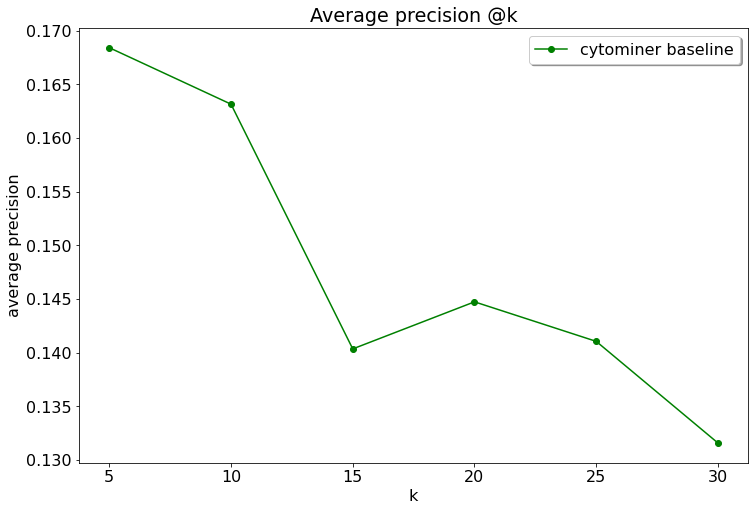

In [8]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(result["k"], result["precision"], marker="o", color="green", label = 'cytominer baseline')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [11]:
result.to_csv('../results/precision_baseline_top20.csv')
